# Heart Database - Classificador

O objetivo desta tarefa é implementar um classificador KNN capaz de prever a presença de doença cardíaca usando os dados do Heart Disease.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.pipeline import make_pipeline

In [3]:
df = pd.read_csv('heart.csv')
df.shape

(1025, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## Análise Exploratória dos Dados

Informação sobre as features do dataset:

 - age: idade da pessoa em anos.
 - sex: sexo da pessoa (geralmente codificado como 1 = masc, 0 = fem).

 - chest pain type (4 values): tipo de dor no peito (4 valores), indica o tipo de dor torácica, podendo ser:

0: angina típica

1: angina atípica

2: dor não anginosa

3: assintomático

 - resting blood pressure: pressão arterial em repouso pressão sanguínea em repouso (em mmHg), medida na admissão ao hospital.

 - serum cholestoral in mg/dl: colesterol sérico em mg/dl, nível de colesterol total no sangue.

 - fasting blood sugar > 120 mg/dl: glicemia em jejum > 120 mg/dl
indica se o nível de açúcar no sangue em jejum é superior a 120 mg/dl (1 = sim, 0 = não).

 - resting electrocardiographic results (values 0,1,2): resultados do eletrocardiograma em repouso (valores 0,1,2), resultado da análise do ECG em repouso:

0: normal

1: anormalidade no segmento ST-T

2: hipertrofia ventricular esquerda provável ou definitiva

 - maximum heart rate achieved: frequência cardíaca máxima alcançada, maior frequência cardíaca atingida durante o teste de esforço.

 - exercise induced angina: angina induzida por exercício
presença de dor no peito provocada pelo exercício (1 = sim, 0 = não).

 - oldpeak = ST depression induced by exercise relative to rest: oldpeak = depressão do segmento ST induzida pelo exercício em relação ao repouso
diferença no segmento ST do ECG após o esforço físico em comparação ao estado de repouso, indicando possível isquemia.

- the slope of the peak exercise ST segment: inclinação do segmento ST no pico do exercício inclinação do segmento ST durante o esforço máximo:

0: descendente

1: plano

2: ascendente

 - number of major vessels (0-3) colored by flourosopy: número de principais vasos (0–3) visualizados por fluoroscopia
número de vasos sanguíneos principais com evidência de fluxo detectável (coloridos) por fluoroscopia.

 - thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

 thal: 0 = normal; 1 = defeito fixo; 2 = defeito reversível
resultado do teste de talassemia ou cintilografia do miocárdio:

0: normal

1: defeito fixo (área do coração que não recebe sangue adequadamente mesmo em repouso)

2: defeito reversível (área com fluxo sanguíneo reduzido durante o exercício, mas normal em repouso)

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


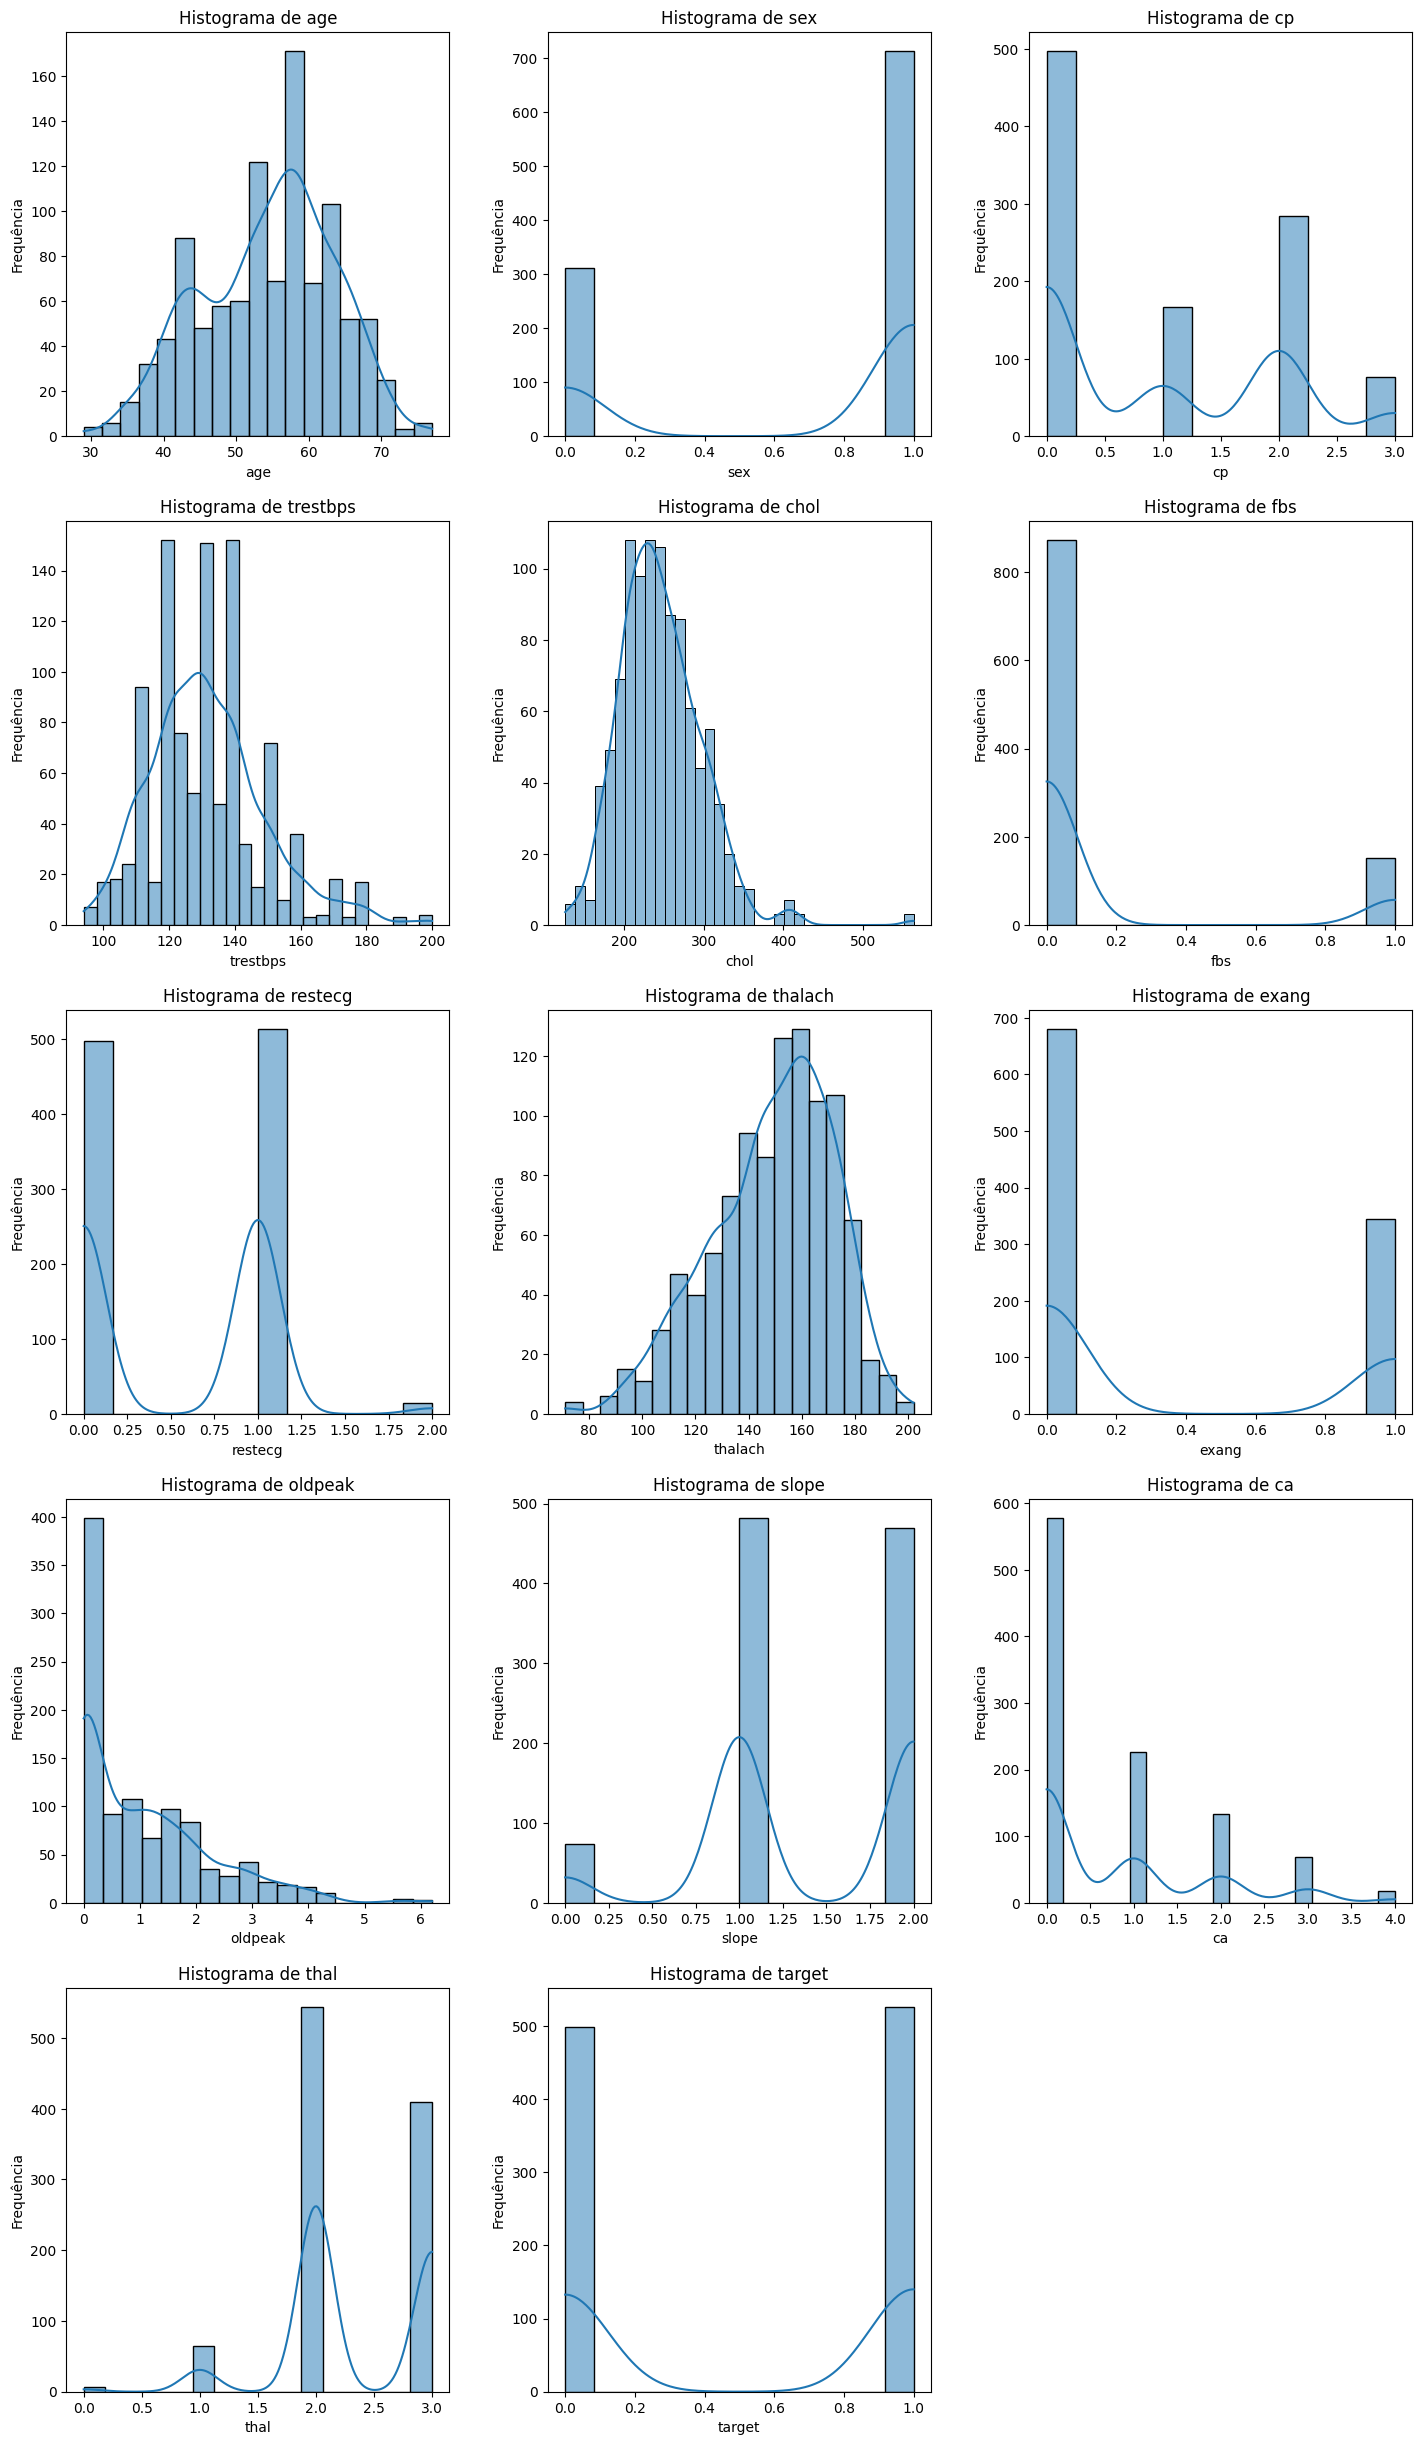

In [7]:
# Plotando Histogramas das variáveis numéricas
colunas_numericas = df.select_dtypes(include=['int64', 'float64']).columns

# Configurar a figura e os subplots
num_cols = len(colunas_numericas) 
num_rows = (num_cols // 3) + (1 if num_cols % 3 != 0 else 0)  

fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))  
fig.tight_layout(pad=4.0)  

# Iterar sobre as colunas numéricas e plotar os histogramas
for i, coluna in enumerate(colunas_numericas):
    row = i // 3  
    col = i % 3   
    ax = axes[row, col] if num_rows > 1 else axes[col] 
    sns.histplot(df[coluna], kde=True, ax=ax)  
    ax.set_title(f'Histograma de {coluna}')  
    ax.set_xlabel(coluna)  
    ax.set_ylabel('Frequência')  

# Remover subplots vazios (se tiver)
if num_cols % 3 != 0:
    for j in range(num_cols % 3, 3):
        fig.delaxes(axes[num_rows - 1, j])


plt.show()

In [8]:
# Verificando valores ausentes
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.duplicated().sum()

723

In [10]:
df = df.drop_duplicates()

In [11]:
df.duplicated().sum()

0

Dataset não possui valores ausentes ou valores categóricos para serem transformados ou preenchidos na etapa de pré-processamento. Contudo, apesar de estarem próximos de uma distribuição normal, ainda será necessário normalizar os dados.

# Pré-Processamento dos Dados

In [12]:
# Dividindo o conjunto de dados
X = df.drop(columns=['target'])
y = df['target']

In [13]:
# Dividindo em Treino e Teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [14]:
X_treino.shape, X_teste.shape, y_treino.shape, y_teste.shape

((211, 13), (91, 13), (211,), (91,))

In [ ]:
# Normalizando os dados
scaler = MinMaxScaler()
X_treino = scaler.fit_transform(X_treino)
X_teste = scaler.transform(X_teste)

## Criação do Modelo e Validação Cruzada

In [16]:
# Retreinando o modelo KNN para testar os valores de K usando pipeline
k_values = [1, 3, 5, 7, 9, 11, 13, 15]
accuracies = []

for k in k_values:
    pipeline = make_pipeline(MinMaxScaler(), KNeighborsClassifier(n_neighbors=k))
    scores = cross_val_score(pipeline, X, y, cv=5)
    accuracies.append(scores.mean())

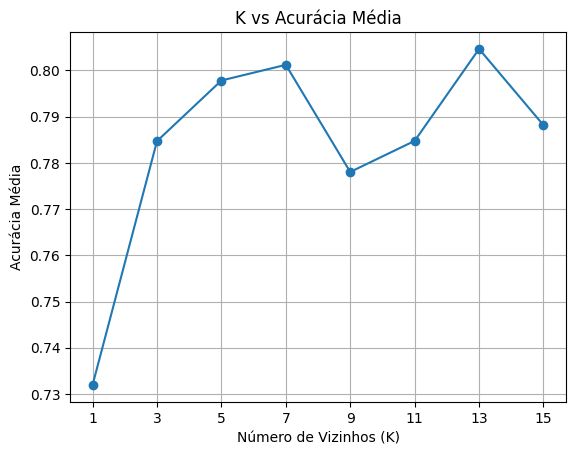

In [17]:
# Plotagem do gráfico K x Acurácia
plt.plot(k_values, accuracies, marker='o')
plt.title('K vs Acurácia Média')
plt.xlabel('Número de Vizinhos (K)')
plt.ylabel('Acurácia Média')
plt.xticks(k_values)
plt.grid(True)
plt.show()

Através do gráfico acima é possível identificar que o valor de K (número de vizinhos) que obteve melhor acurácia foi de **13**, sendo mais de **80%** de acurácia.

In [18]:
# Treinamento do modelo após encontrar o melhor K
# KNN
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_treino, y_treino)

KNeighborsClassifier(n_neighbors=13)

## Métricas

In [19]:
# Previsão do Modelo
y_pred = knn.predict(X_teste)

In [20]:
y_pred

array([0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0], dtype=int64)

In [21]:
acuracia = accuracy_score(y_teste, y_pred)
print(f"Acurácia: {acuracia:.2f}")

Acurácia: 0.80


In [24]:
# Métricas
print(classification_report(y_teste, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        42
           1       0.82      0.82      0.82        49

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91



<Figure size 600x500 with 0 Axes>

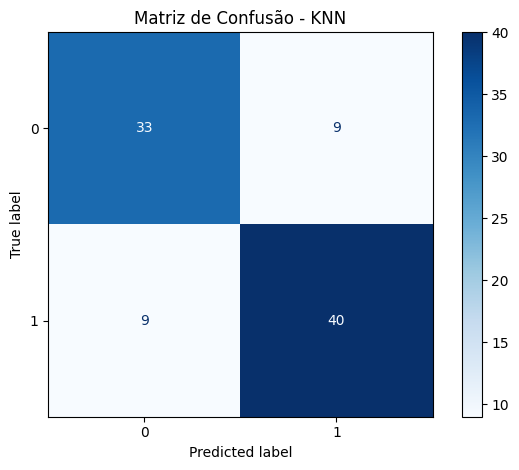

In [23]:
# Plotando a matriz de confusão
matriz_confusao = confusion_matrix(y_teste, y_pred)
plt.figure(figsize=(6, 5))
ConfusionMatrixDisplay.from_predictions(y_teste, y_pred, 
                                        cmap='Blues',
                                        display_labels=knn.classes_)

plt.title("Matriz de Confusão - KNN")
plt.tight_layout()
plt.show()